# Solving for Orbits around Black-Holes using Numerical Integrators

##### Written by Pierre Christian, Steward Observatory


## Introduction

Imagine a particle, located at a distance $r$ from a black-hole of mass $M$ (see picture below). In this module, we will explore the motion of this particle as it orbits around the black-hole, and how this motion can be used to test our understanding of gravity! Along the way, we will learn about *numerical integration*, an important tool that will allow us to use computers to solve equations that are too complicated to solve by hand. 

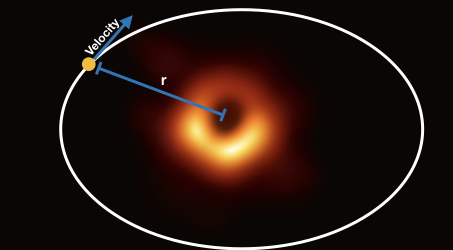

We will start with what we know of the laws of gravity (what Newton discovered). Then three basics are needed to understand numerical integration before we apply it to the motion of a particle around a black hole. That has us  exploring numerical integration with respect first to a ball at constant velocity and then to a ball with changing velocity. Then we will explore numerical integration with respect to a ball on a spring. With that information we will be able to see whether Newton's law of gravity (e.g., the gravity we know) will help determine a particle's motion around a black hole or whether the gravitational law of general relativity would be better suited and why.
___

# How to Use This Notebook

The webpage you are in is actually an app - much like the ones on your cellphone. This app consists of cells.

An *input* cell looks like a light grey box with an `In [ ]:` on its left. Input cells each contain code - instructions to make the computer do something.

To activate or select a cell, click anywhere inside of it.

<div class='alert alert-info'>
    <font size='3'><b>Select the cell below and read its contents.</b></font>
</div>

In [1]:
# Text that follows a "#" is known as a comment.
# Comments do not affect your code in any way.
# You should always read the comments at the top of each cell you interact with.
# Comments will be used to describe what the cell's code is actually doing.

To execute or run a selected cell, hit `[Shift + Enter]` on your keyboard.

<div class='alert alert-info'>
    <font size='3'><b>Select the cell below and read its contents. Then, run the cell.</b></font>
</div>

In [2]:
# Text that DOESN'T follow a "#" is considered code.
# Lines of code are instructions given to your computer.
# The line of code below is a "print" statement.
# A print statement literally prints out the text between its quotes.

print("Congrats! You have successfully run your first cell!")

Congrats! You have successfully run your first cell!


Running a cell creates an *output* directly below it. An output can be some text, a graph, an interactive slider, or even nothing at all! For that last case, you know you have run a cell when the `In [ ]:` becomes `In [#]:`, where "#" is any number.

You can learn more about how Jupyter notebooks work at https://try.jupyter.org/
___

# Pre-Activity Setup

In order for any of the activities to work properly, you must import the libraries needed for the code in this notebook.

<div class='alert alert-info'>
    <font size='3'><b>Select and run the cell below.</b></font>
</div>

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import *

___

# Newton's Law of Universal Gravitation

### The kind of gravity we deal with every day...

The first mathematical theory of gravity was *Newton's law of universal gravitation*, or *Newtonian gravity* for short. Named after its discoverer, Sir Isaac Newton (1643-1727), Newtonian gravity was our most accurate theory of gravity for more than 330 years. 

In Newtonian gravity, our particle feels the gravitational acceleration $a$ whose magnitude (or strength) is given by,

\begin{equation}
a(r) = -\frac{G M}{r^2} \; ,
\end{equation}

where $G$ is the Newtonian gravitational constant (i.e. just a fixed number), $M$ is the mass of the black hole and $r$ is the distance between the black hole and the particle. Equations like these are called *equations of motion*, and different theories of gravity prescribe different equations of motions. 

In addition to its acceleration, the particle also possesses a velocity, whose magnitude (or strength) is given by $v$, which describes the speed of the particle as it orbits the black-hole. While the acceleration is always pointing towards the black hole, the particle can have a velocity that points in arbitrary directions. What do we mean by that? Let's give an example. While you stand on the Earth, gravity, $a$, is always pulling you down toward the center of the Earth. But you might be running forward with a velocity $v$ on the surface of the Earth. The result is similar to what is happening in the image below. 
<br>
<br>

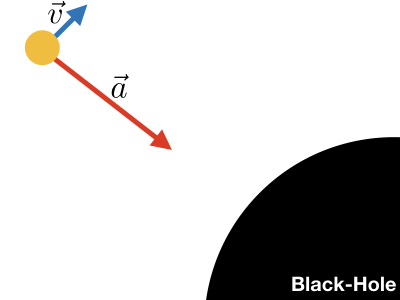

Given the mass of the black-hole in solar masses (e.g., how many times the mass of our Sun), and the distance $r$ in AU (e.g, how many times the distance between our Earth and the Sun), the following code computes the magnitude of the accleration due to Newtonian gravity. Note that $Msol$ is the mass of our Sun (called Sol).

In [6]:
def Newton(M,r):
    """ Returns the magnitude of the Newtonian acceleration given mass M in Solar Masses and distance r in AU. """
    Msol = 2.0e30       # Mass of the Sun in kilograms (kg)
    AU = 1.5e11         # The "astronomical unit", i.e. the Sun-Earth distance in meters (m)
    G = 6.673e-11       # Gravitational constant [N (m/kg)^2]
    return G*(M*Msol)/(r*AU)**2.

# Please note that Msol and AU are unit conversions in the above equation.
print("You have defined the Newton function. Nice Job!")

You have defined the Newton function. Nice Job!


<font color="blue">**NOTE:**</font> Throughout this module, the mathematical functions like the one in the code above (called **Newton**) will be boldfaced.

<font color="blue">**QUESTION:**</font> What is the magnitude of the Newtonian acceleration 1 AU away from Sagittarius A\*, the black-hole at the center of the Milky Way Galaxy? Since Sagittarius A\* has 4.3 million times the mass of the Sun, we can plug $ M = 4.3 \times 10^6 $ (also written as 4.3e6) into the **Newton** function:  

$$
a(1 AU) = -\frac{G \times 4.3 \times 10^6 kg}{(1 AU)^2} \;
$$



In [7]:
Newton(4.3e6,1)

25505.68888888889

<font color="blue">**NOTE:**</font> Although the **Newton** function only returned numbers, we need to remember the units: *meters per second per second*, or $m/s^2$. These are the units of *acceleration* $a$, which is the the change in velocity as time passes.

Let's compare this to the gravitational acceleration exerted on the Earth by the Sun. We can use the **Newton** function, now with M=1:

$$
a(1 AU) = -\frac{G \times 1 Msol}{(1 AU)^2} \;
$$


In [8]:
Newton(1,1)

0.005931555555555556

Upon taking the ratio, we see that at the same distance, the gravitational acceleration due to Sagittarius A\* is 4.3 million times larger than that due to the Sun,

$$
-\frac{G \times 4.3 \times 10^6 Msol}{(1 AU)^2} \;
$$

divided by

$$
-\frac{G \times 1 Msol}{(1 AU)^2} \;
$$

will give you the ratio of 4.3 $\times$ 10$^6$ solar masses to 1 solar mass or just:


In [9]:
Newton(4.3e6,1)/Newton(1,1)

4300000.0

<font color="blue">**QUESTION:**</font> What does that number tell you about the black hole, Sagittarius A, at the center of our galaxy (1 Earth-Sun distance away or 1 AU) compared to the kind of gravitational acceleration or pull that we feel here on Earth because of the Sun?

Now, we want to solve for the orbit of our particle around the black hole. While this is doable by hand, we will instead use computers to do this task, using a technique called *numerical integration*. The importance of numerical integration cannot be overstated. This technique is ubiquitous (e.g., used everywhere) in the physics literature as professional physicists often have to work with equations that are too complex to be solved by pen-and-paper.
___

# Intro to Numerical Integration

## Part 1: To start with...

Let's consider a much simpler problem: a ball starts at position $x=0$, and possess a constant velocity $v$. 
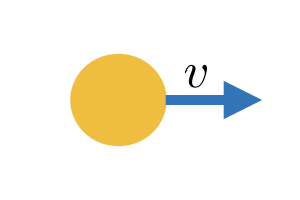

<font color="blue">**QUESTION:**</font> What is the distance travelled by the ball at time $\tau$ later? We can solve this by performing the multiplication,

$$
x(\tau) = v\tau \; .
$$

We can easily write this up in code:

In [10]:
def ConstantBall(v,tau):
    ''' Integrates the motion of a ball moving with constant velocity v for time tau'''    
    
    return v*tau

print("You have defined the ConstantBall function. Nice Job!")

You have defined the ConstantBall function. Nice Job!


Try it out, with $v$=1 and $\tau$=1 or other small values. Enter the numbers in the next cell. 

<font color="blue">**NOTE:**</font> Physicists when creating computer programs, often leave numbers unitless in their calculations. As long all of the parameters of the equation use the same units on both sides of the equal sign, that is considered the norm. So for instance, if the velocity $v$ is 1 and $\tau$ is 1, they could be in units for the speed of light (300,000 kilometers per second) and time (or $\tau$) in seconds, respectively. Your answer for distance could be in units of kilometers or perhaps a fraction of the speed of light within a time $\tau$.

In [11]:
ConstantBall(1,1)

1

## Part 2: Ball with Changing Velocity

What if the ball's velocity changes with position (we notate this with $v=v(x)$)? This is the case, for example, with a ball rolling down a hill. It's velocity initially is smaller than its velocity at a later time as it rolls downhill.

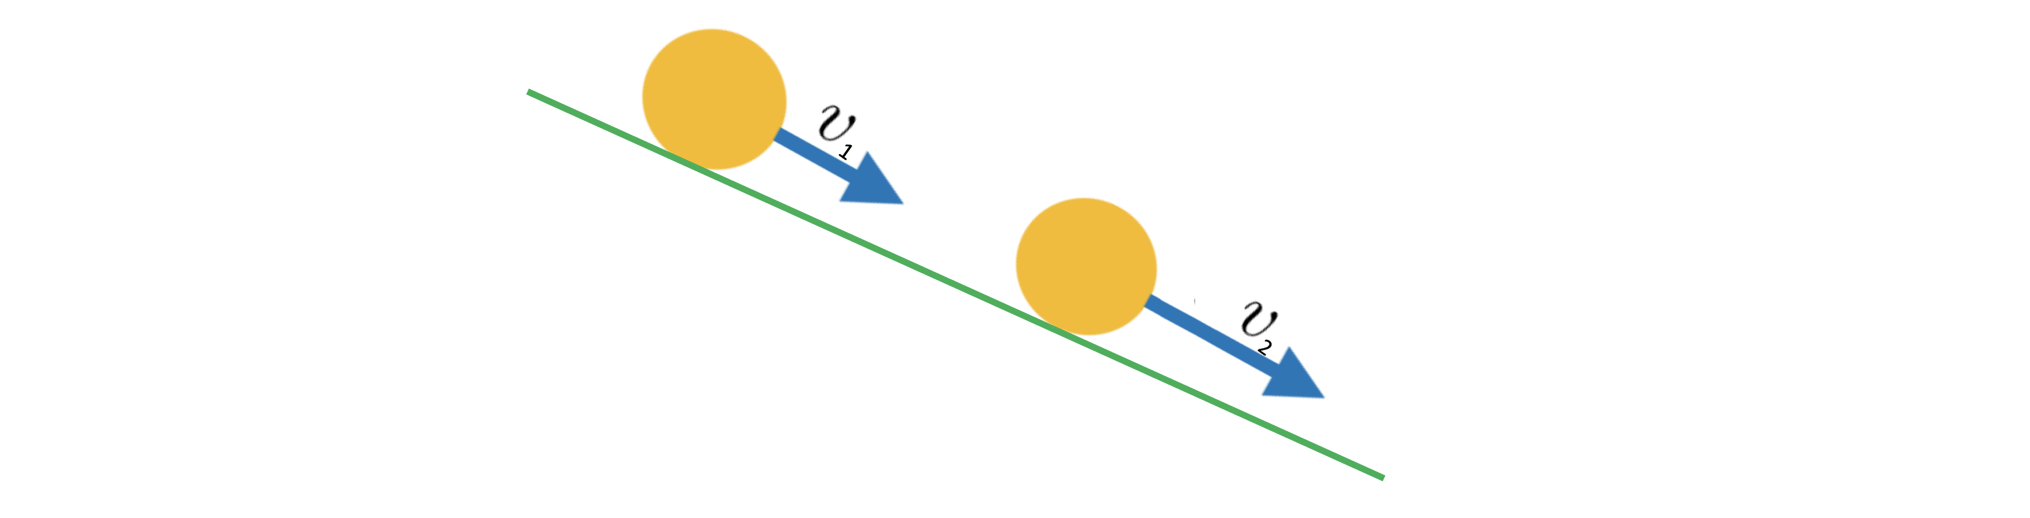

In short, in this instance, the further the ball travels, the faster it goes ($v(x)$ increases with time and distance).

<font color="blue">**QUESTION:**</font> In what direction is $a$, the gravitational acceleration (or gravity), pointed in the above diagram?

There are instances where, depending on what the $v(x)$ function is, the equation for $v(x)$ can be very complicated to solve by hand. One example of this would be solving the equation for $v(x)$ for a ball on a spring. In cases like that, the equation can be solved *numerically* by making the approximation that for a small chunk of time $T$, the ball's velocity is approximately constant. To get an understanding of this, let's first picture this process:

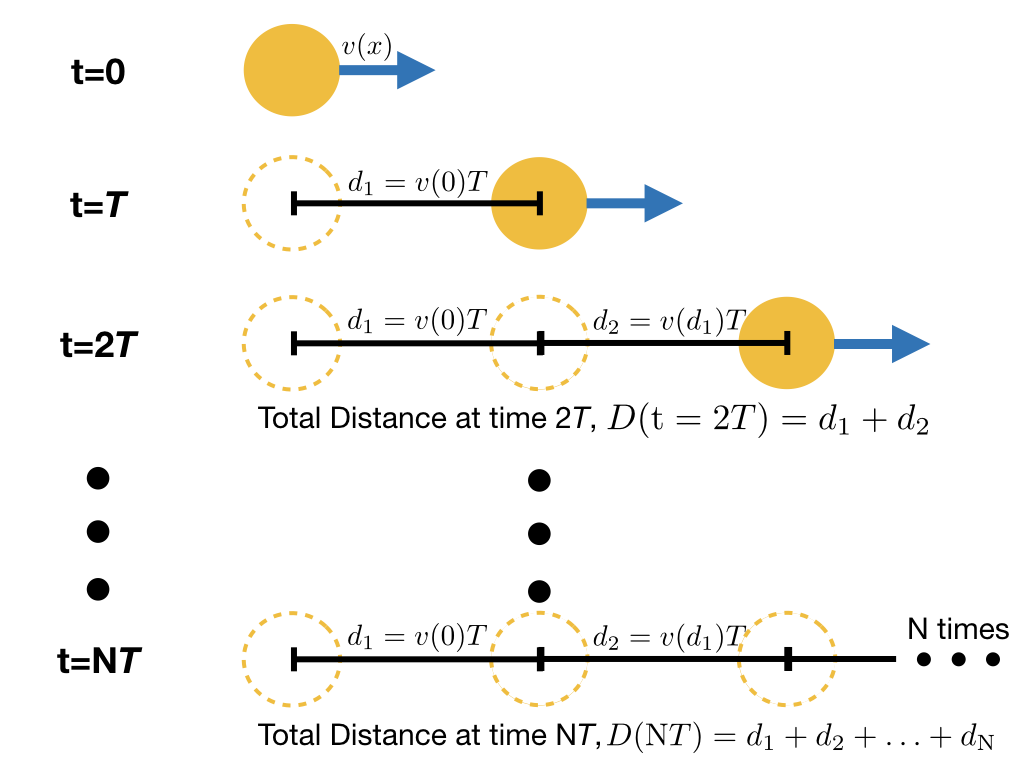

At $t=0$, the ball is at $x=0$, moving with some velocity $v(0)$. At $t=T$, the ball moves a distance $d_1=v(0)T$. This is the approximation that the velocity is constant for a small amount of time $T$.


At $t=2T$, the ball moves a further distance $d_2=v(d_1)T$.

By breaking up the calculation into N *timesteps*, each of length $T$, we can approximate the motion for the entire length of time $\tau=\text{N}T$ as 

$$
x(\tau) \approx v(0)T + v(d_1)T + \ldots + v(d_{(\text{N}-1)})T \; .
$$

This technique is referred to as *numerical integration*. This can be tricky to understand at first; take your time to go over the explanation multiple times before you proceed. Answer the following question: **When is it appropriate to use this technique?**

Let's look at this more closely. We can write this numerical integration as code.

First, we write a function for the velocity, which we will call **velocity**:

In [12]:
def velocity(x):
    ''' Returns the velocity of the ball, as a function of position, x. '''
    return x

print("You have defined the velocity function. Nice Job!")

You have defined the velocity function. Nice Job!


This next function returns a value for $x$; so the velocity is $v(x)=x$. 

Next, we write up our numerical integral:

In [13]:
def MyFirstIntegrator(x0,T,N):

    ''' Integrates the motion of a ball moving with velocity v(x) for time NT. ''' 
    
    # Generates an array of N zeros, the nth entry of this array represents the position of the ball at time t=nT
    xlist = np.zeros(N)
    
    # Initial condition: the ball starts at x=x0, so the 0th entry of xlist is x0
    xlist[0] = x0

    # Use a for loop to integrate N times, each integral in the loop is done over time T
    for n in range(N-1):
        xlist[n+1] = xlist[n] + T*velocity(xlist[n]) # Here we call the velocity function that we defined earlier

    # Plot the resulting motion
    plt.figure()
    # Note the x-axis: np.arrange(N) produces the array (0,1,2,...,N). We multiply this by T because each timestep is of length T. 
    plt.plot(np.arange(N)*T,xlist, 'g')
    plt.xlabel(r"$t$")
    plt.ylabel(r"$x$")
    plt.grid()
    
    # Returns the array of x's: position of the ball as a function of time.
    return xlist

print("You have defined the MyFirstIntegrator function. Nice Job!")

You have defined the MyFirstIntegrator function. Nice Job!


I have added a new parameter, $x_0$ (written as x0, without subscript, in Python). This is the position of the ball at $t=0$. There is no reason why we should restrict our integrator to a ball that starts at $x=0$!

Let's see what happens if I set 
$$
v(x) = x \; ,
$$
i.e. the ball moves faster the further away it is.

<font color="blue">**QUESTIONS:**</font> What is the ball's position as a function of time? See the "widget" with the slider and interactive plot below. **Play around with x0 and N. How do these parameters change the plot?** What happens if you set the ball's starting position, x0, to 0? Why?

In [14]:
x0       = FloatSlider(min=-1, max=1, step=0.1, value=0.1)
T        = FloatSlider(min=0, max=1, step=0.0001, value=0.0001, disabled=True)
N        = IntSlider(min=0, max=100000, step=1000, value = 100000)#, disabled=True)

interactive(MyFirstIntegrator, x0=x0, T=T, N=N)

A Jupyter Widget

## Part 3: Ball on a Spring

Let's use our numerical integrator to solve the ball-on-a-spring problem. 

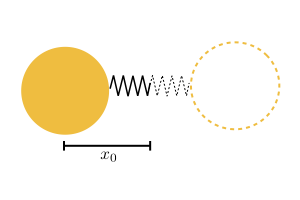

The ball accelerates because it is attached to the spring, and the further away the ball is, the stronger the acceleration. The *acceleration* function is 

$$
a(x) = -x \; ,
$$

<font color="blue">**QUESTION:**</font> **Why is there a negative sign?** <font color="blue">**HINT:**</font>Think of what direction you are pulling the ball with respect to the spring.

The following code computes the motion of the ball on a spring system:

In [16]:
def acceleration(x,v):
    
    ''' Returns the acceleration of the ball, as a function of position, x and velocity, v. '''
    
    return -x

def AcceleratingBall(x0,v0,T=0.1,N=1000):
    
    ''' Integrates the motion of a ball moving with acceleration a(x,v) for time NT. ''' 
        
    # Generates an array of N zeros, the nth entry of this array represents the position of the ball at time t=nT
    xlist = np.zeros(N)
    # Generates an array of N zeros, the nth entry of this array represents the velocity of the ball at time t=nT
    vlist = np.zeros(N)

    # Initial condition: the ball starts at x=x0, so the 0th entry of xlist is x0
    xlist[0] = x0
    # Initial condition: the ball starts at v=v0, so the 0th entry of xlist is v0
    vlist[0] = v0

    # Use a for loop to integrate N times, each integral in the loop is done over time T
    for n in range(N-1):
        xlist[n+1] = xlist[n] + T*vlist[n] # At timestep n+1, the position is advanced by the velocity at timestep n multiplied by T.
        vlist[n+1] = vlist[n] + T*acceleration(xlist[n],vlist[n]) # Here we call the acceleration function that we defined earlier

    # Plot the resulting motion
    plt.figure()
    # Note the x-axis: np.arrange(N) produces the array (0,1,2,...,N). We multiply this by T because each timestep is of length T. 
    plt.plot(np.arange(N)*T,xlist, 'g')
    plt.xlabel(r"$t$")
    plt.ylabel(r"$x$")
    plt.grid()
    
    # Returns the array of x's: position of the ball as a function of time.
    return xlist

<font color="blue">**QUESTIONS:**</font> What is the motion of a ball with this acceleration? See the "widget" with the slider and interactive plot below. **Play with x0 (the starting location of the ball), v0 (the starting velocity of the ball), and N (how many times we make the calculation or how many intervals of T there are). What do you notice?**

In [17]:
x0       = FloatSlider(min=0, max=10, step=0.1, value=0, disabled=False)
v0       = FloatSlider(min=0, max=10, step=0.1, value=1, disabled=False)
T        = FloatSlider(min=0, max=1, step=0.01, value=0.01, disabled=True)
N        = IntSlider(min=1000, max=100000, step=1000, value = 10000, disabled=False)

interactive(AcceleratingBall, x0=x0, v0=v0, T=T, N=N)

A Jupyter Widget

As time progresses, the amplitude of the oscillation increases, i.e. **the energy of the system increases with time**. In reality, this should not happen in reality, because physics dictates that energy should always be conserved! Therefore there is an error in our numerical integration scheme. The point here was to show that there are instances where simple numerical integration do not always work perfectly. Fortunately, the more complex integration schemes do not suffer from this error.
___

# The Gravity We Know: Newton's Law, Integrated

Now, we are ready to numerically integrate Newton's laws, 

$$
a(r) = -\frac{G M}{r^2} \; ,
$$

or pictorially, 

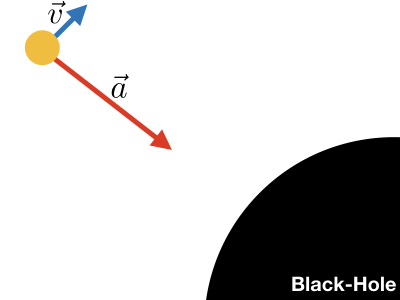

Again, $G$ is the Newton's constant (i.e. just a number), while $r$ is the distance between the black hole and the particle.

We can use the numerical integration technique we learned in the previous sections to perform this calculation. First, let us define a function that computes both the velocity and acceleration at once:

In [18]:
def v_and_a(x, y, vx, vy):
    
    ''' Returns the accelerations and velocities of the system. '''
    
    rho = np.sqrt(x**2 + y**2) 
    ax = -0.5*x/rho**3
    ay = -0.5*y/rho**3
     
    # Here we return an array that contains both velocities, vx & vy, as well as both accelerations, ax & ay     
    return (vx, vy, ax, ay)

This code below performs the calculation in much the same way as we did for the ball-on-a-spring:

In [19]:
def Orbit(x0,y0,vx0,vy0,T,N):
    
    ''' Integrates the motion of a particle moving around a black-hole with Newtonian gravity. Integration is done over
     time NT. ''' 
    
    # Generates four arrays of N zeros, the nth entry of this array represents the x, y, vx, and vy at time t=nT
    xlist = np.zeros(N)
    ylist = np.zeros(N)
    vxlist = np.zeros(N)
    vylist = np.zeros(N)
    
    # Initial condition: the particle starts at x=x0, y=y0, vx=vx0, vy=vy0
    xlist[0] = x0
    ylist[0] = y0
    vxlist[0] = vx0
    vylist[0] = vy0

    # Use a for loop to integrate N times, each integral in the loop is done over time T
    for n in range(N-1):
        # Here we call the v_and_a function that we defined earlier to give us the velocity and acceleration of the particle at that time
        xlist[n+1] = xlist[n] + T*v_and_a(xlist[n], ylist[n], vxlist[n], vylist[n])[0]
        ylist[n+1] = ylist[n] + T*v_and_a(xlist[n], ylist[n], vxlist[n], vylist[n])[1]
        vxlist[n+1] = vxlist[n] + T*v_and_a(xlist[n], ylist[n], vxlist[n], vylist[n])[2]
        vylist[n+1] = vylist[n] + T*v_and_a(xlist[n], ylist[n], vxlist[n], vylist[n])[3]
    
    # Plot the resulting motion
    plt.figure()
    plt.plot(xlist, ylist, 'g', [0], [0], 'ro')
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.grid()

<font color="blue">**QUESTION:**</font> Play around with the parameters of **Orbit** using the "widget" with the slider and interactive plot below. In the previous section, we showed that an error in our integration scheme causes energy to increase. **Do we get the same error here?** Note that x0 and y0 refer to the particle's starting position in 2-dimension, vx0 and vy0 refer to the particle's starting velocities in the x and y directions, and again the parameter $N$ refers to how many times we make the calculations.

In [20]:
x0       = FloatSlider(min=3, max=10, step=1, value=10)
y0       = FloatSlider(min=0, max=10, step=1, value=0, disabled=True)
vx0      = FloatSlider(min=0, max=0.1, step=0.01, value=0)
vy0      = FloatSlider(min=0, max=0.2, step=0.01, value=0.19)
T        = FloatSlider(min=0, max=1, step=0.01, value=0.01, disabled=True)
N        = IntSlider(min=0, max=20000, step=1000, value = 20000, disabled=True)

interactive(Orbit, x0=x0, y0=y0, vx0=vx0, vy0=vy0, T=T, N=N)

A Jupyter Widget

___

# The Gravity Near a Black Hole: Orbits in General Relativity

In the first half of the 20th century, Albert Einstein (1879-1955) devised a theory of gravity called general relativity. Since then, general relativity has passed a battery of experimental tests and is now touted as our most accurate theory of gravity. 

Using Einstein's theory of general relativity, Karl Schwarzschild (1873-1916) derived a correction to the Newtonian gravitational equation of motion (while he was serving in the frontline during World War I!). This new equation for the magnitude of the accleration of a particle in general relativity, $a_{GR}$, is

\begin{align}
a_{GR} &= a_N + a_{\textrm{correction}} \; ,
\end{align}

where $a_N$ is the magnitude of the gravitational acceleration in Newton's theory, i.e. our old friend, 

$$
a(r) = -\frac{G M}{r^2} \; ,
$$

and $a_{\textrm{correction}}$ is a correction term that involves things like the particle's angular momentum. (See a one-minute explanation of angular momentum at https://www.youtube.com/watch?v=iWSu6U0Ujs8.) Angular momentum is the angular velocity multiplied by something called the moment of inertia. The moment of inertia in this case is the mass times the distance squared (e.g., the mass of the black hole and the distance of the particle to the black hole).

Let us modify the code **v_and_a** to return the general relativistic acceleration if a new variable, called Einstein, is set to 1:

In [21]:
def v_and_a(x, y, u, v, Einstein):
    """ Returns the accelerations and velocities of the system. If Einstein=0, returns the Newtonian gravitational
    acceleration. If Einstein=1, returns the general relativistic expression instead."""
    
    rho = np.sqrt(x**2 + y**2)
    velocity_x = u
    velocity_y = v
    
    if Einstein == 1:
        # If Einstein=1, returns the general relativistic expressions
        l = (x*v - y*u)
        acceleration_x = (-0.5*x/rho**3)*(1. + 3.*l**2/rho**2)
        acceleration_y = (-0.5*y/rho**3)*(1. + 3.*l**2/rho**2)
    elif Einstein == 0:
        # If Einstein=0, returns the Newtonian expressions
        acceleration_x = -0.5*x/rho**3
        acceleration_y = -0.5*y/rho**3
        
    # Here we return an array that contains both velocities, vx & vy, as well as both accelerations, ax & ay     
    return (velocity_x, velocity_y, acceleration_x, acceleration_y)

Now, all we have to do is to modify following function, **Orbit**, to accept this new parameter. The function, **Orbit**, integrates the motion of a particle moving around a black-hole with Newtonian gravity over time NT.

In [22]:
def Orbit(x0,y0,vx0,vy0,T,N,Einstein):
    
    ''' Integrates the motion of a particle moving around a black-hole with Newtonian gravity. Integration is done over
     time NT. ''' 
    
    # Generates four arrays of N zeros, the nth entry of this array represents the x, y, vx, and vy at time t=nT
    xlist = np.zeros(N)
    ylist = np.zeros(N)
    vxlist = np.zeros(N)
    vylist = np.zeros(N)
    
    # Initial condition: the particle starts at x=x0, y=y0, vx=vx0, vy=vy0
    xlist[0] = x0
    ylist[0] = y0
    vxlist[0] = vx0
    vylist[0] = vy0

    # Use a for loop to integrate N times, each integral in the loop is done over time T
    for n in range(N-1):
        # Here we call the v_and_a function that we defined earlier to give us the velocity and acceleration of the particle at that time
        xlist[n+1] = xlist[n] + T*v_and_a(xlist[n], ylist[n], vxlist[n], vylist[n], Einstein)[0]
        ylist[n+1] = ylist[n] + T*v_and_a(xlist[n], ylist[n], vxlist[n], vylist[n], Einstein)[1]
        vxlist[n+1] = vxlist[n] + T*v_and_a(xlist[n], ylist[n], vxlist[n], vylist[n], Einstein)[2]
        vylist[n+1] = vylist[n] + T*v_and_a(xlist[n], ylist[n], vxlist[n], vylist[n], Einstein)[3]
    
    # Plot the resulting motion
    plt.figure()
    plt.plot(xlist, ylist, 'g', [0], [0], 'ro')
    # Title the plots, if Einstein=0 as "Newtonian Orbit" and if Einstein=1 as "Einsteinian Orbit"
    if Einstein == 0:
        plt.title("Newtonian Orbit")
    elif Einstein == 1:
        plt.title("Einsteinian Orbit")
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.grid()

<font color="blue">**QUESTIONS:**</font> Now try out various values of the parameters x0, y0, vx0, and vy0 using the "widget" with the slider and interactive plot below. **Can you make qualitative statements on the differences between Newtonian and Einsteinian orbits? How far do you need to go from the black hole for the Einsteinian orbit to look like the Newtonian one?** 

In [23]:
x0       = FloatSlider(min=10, max=20, step=1, value=10)#, disabled=True)
y0       = FloatSlider(min=0, max=10, step=1, value=0, disabled=True)
vx0      = FloatSlider(min=0, max=0.2, step=0.01, value=0)
vy0      = FloatSlider(min=0, max=0.2, step=0.01, value=0.19)
T        = FloatSlider(min=0, max=1, step=0.01, value=0.01, disabled=True)
N        = IntSlider(min=0, max=50000, step=1000, value = 50000, disabled=True)
Einstein = Checkbox()

interactive(Orbit, x0=x0, y0=y0, vx0=vx0, vy0=vy0, T=T, N=N, Einstein=Einstein)

A Jupyter Widget

___

### Final Challenge

Suppose you have a near-infinite budget, using what you know about the orbits in these two theories of gravity, **devise an experiment to test whether Newton or Einstein is correct**!
___